In [1]:
from pipeline.pipeline import Pipe

In [2]:
parent_dir = 'D:/Yuval/'
mff_filename = 'nap_data/HZ4/HZ4_SLEEP_20210629_132715.mff'
hypno_filename = 'scored_nap_data/HZ4-SharonsScore-oldFormat.txt'
subject_code = 'HZ4'

In [3]:
pipe = Pipe(
    subject_code=subject_code, 
    path_to_mff=parent_dir+mff_filename, 
    output_directory=parent_dir+subject_code,
    path_to_hypno=parent_dir+hypno_filename,
    sf_hypno=1)

pipe_downsampled = Pipe(
    subject_code=subject_code, 
    path_to_mff=parent_dir+mff_filename, 
    output_directory=parent_dir+subject_code,
    path_to_hypno=parent_dir+hypno_filename,
    sf_hypno=1)
pipe_downsampled.resample(sf=100, chunk_secs=100, picks=('E101',))

Reading EGI MFF Header from D:\Yuval\nap_data\HZ4\HZ4_SLEEP_20210629_132715.mff...
    Reading events ...
    Assembling measurement info ...


05-Dec-22 20:34:27 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


Reading EGI MFF Header from D:\Yuval\nap_data\HZ4\HZ4_SLEEP_20210629_132715.mff...
    Reading events ...
    Assembling measurement info ...


05-Dec-22 20:34:27 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.
05-Dec-22 20:34:51 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


In [4]:
pipe.sleep_stats(save_to_csv=False)

{'TIB': 148.66666666666666,
 'SPT': 136.5,
 'WASO': 5.5,
 'TST': 131.0,
 'N1': 6.5,
 'N2': 65.5,
 'N3': 41.5,
 'REM': 17.5,
 'NREM': 113.5,
 'SOL': 2.5,
 'Lat_N1': 2.5,
 'Lat_N2': 4.5,
 'Lat_N3': 13.5,
 'Lat_REM': 61.5,
 '%N1': 4.961832061068702,
 '%N2': 50.0,
 '%N3': 31.6793893129771,
 '%REM': 13.358778625954198,
 '%NREM': 86.6412213740458,
 'SE': 88.11659192825113,
 'SME': 95.97069597069597}

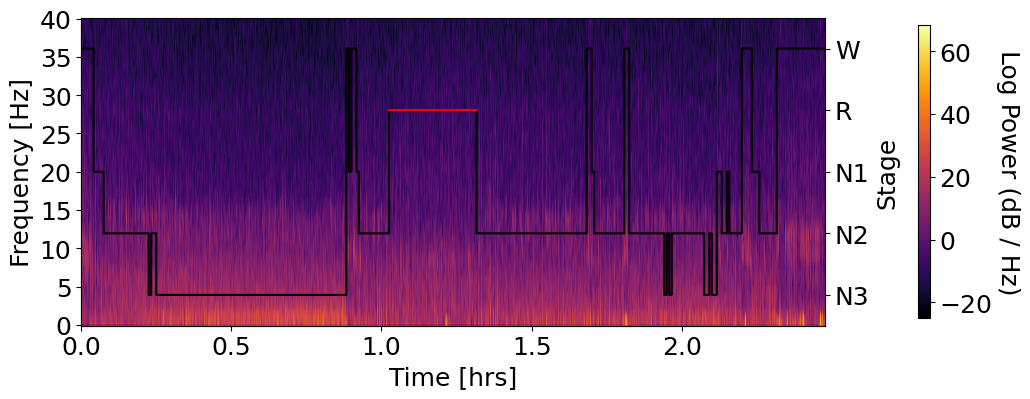

In [5]:
pipe.plot_hypnospectrogram('E101', overlap=True, save=False)

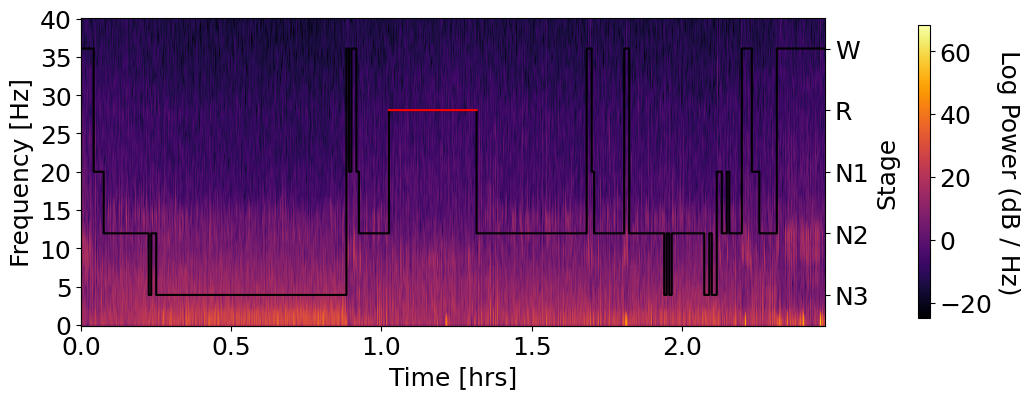

In [6]:
pipe_downsampled.plot_hypnospectrogram('E101', overlap=True, save=False)

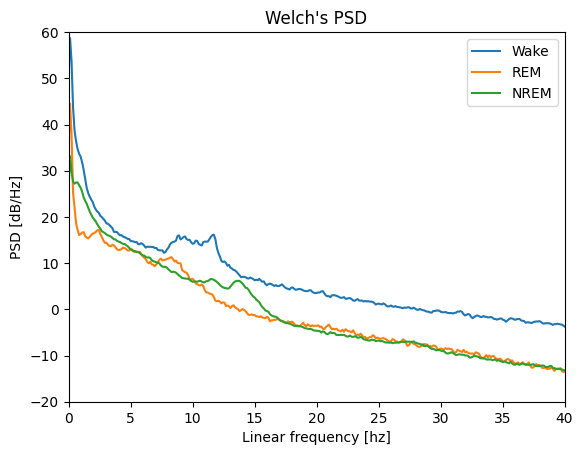

In [7]:
sleep_stages = {'Wake' :0, 'REM':4, 'NREM':[2,3]}
pipe.plot_psd_per_stage('E101', psd_range=[-20, 60], nperseg=8192, sleep_stages = sleep_stages, save=False)

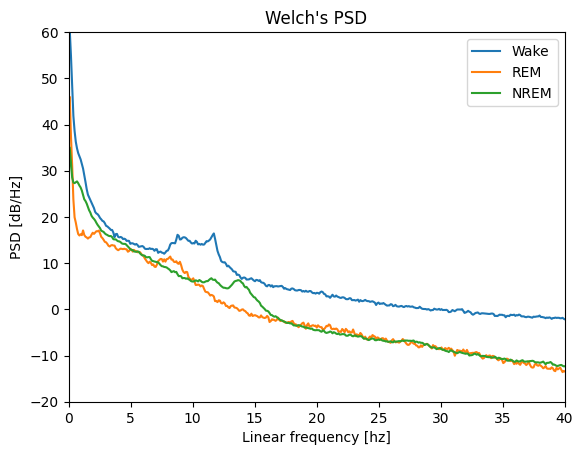

In [8]:
pipe_downsampled.plot_psd_per_stage('E101', psd_range=[-20, 60], nperseg=1024, sleep_stages = sleep_stages, save=False)

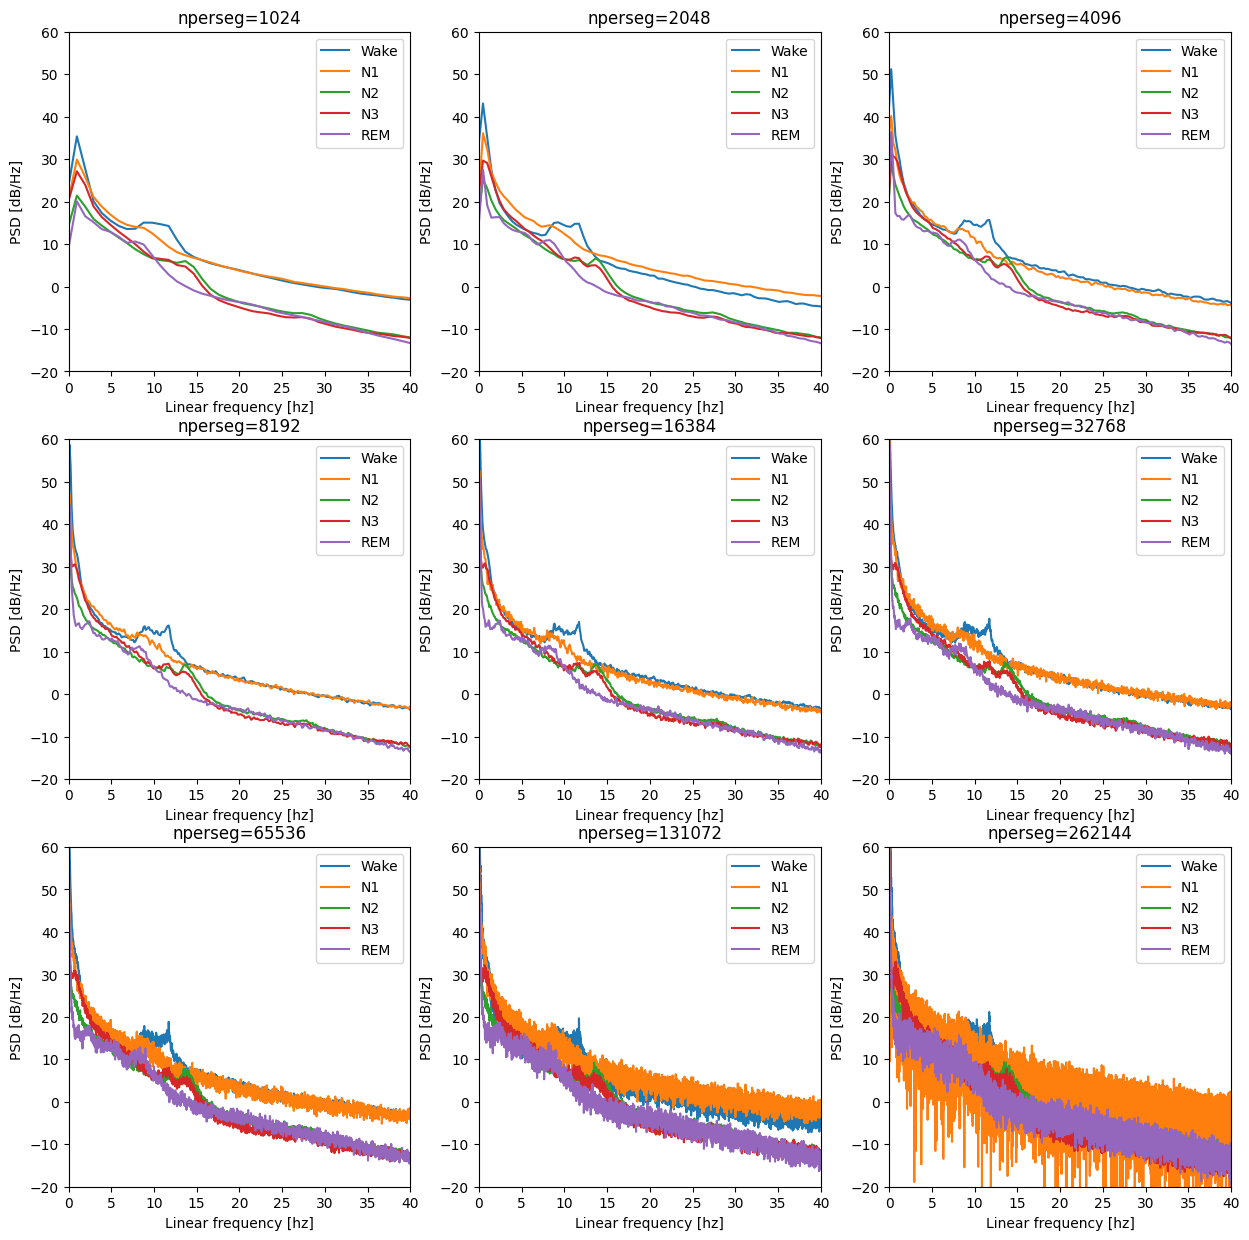

In [9]:
import matplotlib.pyplot as plt
plt.close('all')
n=3
fig, ax = plt.subplots(n,n, figsize=(15, 15))
for i in range(n):
    for j in range(n):
        pipe.plot_psd_per_stage('E101', psd_range=[-20, 60], nperseg=1024*(2**(n*i+j)), axis=ax[i,j], save=False)
        ax[i,j].set_title(f'nperseg={1024*(2**(n*i+j))}')
plt.show()